# Not Fully Connected

## Imports


In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, concatenate
from tensorflow.keras.models import Model

import matplotlib.pyplot as plt
import random
import numpy as np

from tensorflow.keras.callbacks import EarlyStopping

## Data

In [2]:
def gen_data(num_examples, range_start, range_end):
    X = []
    y = []
    for ex in range(num_examples):
        num1 = int(random.random()*(range_end - range_start) + range_start)
        num2 = int(random.random()*(range_end - range_start) + range_start)

        X.append([num1,num2])        
        y.append(num1+num2)
    return np.array(X), np.array(y)

In [3]:
x_train, y_train = gen_data(10, -50, 50)
x_test, y_test = gen_data(10, 50, 200)

x_train = x_train.reshape(x_train.shape[0], 1, x_train.shape[1])
x_test = x_test.reshape(x_test.shape[0], 1,  x_test.shape[1])
[a.shape for a in [x_train, y_train, x_test, y_test]]

[(10, 1, 2), (10,), (10, 1, 2), (10,)]

## Sample Model
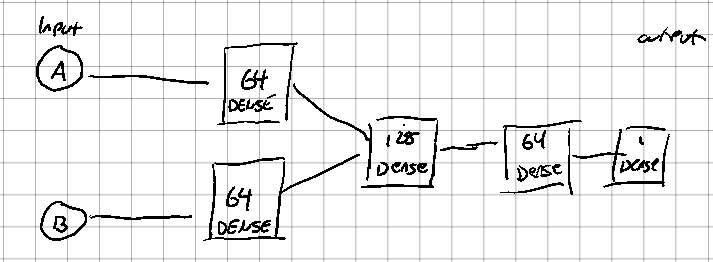

## Building The Model


### Input Layer

In [4]:
# Input layer of 2 neurons 
inp = Input(shape=(1,2))

# get individual neurons from input layer

inp_1 = Lambda(lambda x: x[:,:,0:1])(inp)  # first neuron (A)
inp_2 = Lambda(lambda x: x[:,:,1:2])(inp) # second neuron (B)

### Hidden Layers

In [5]:
# Dense Layer for inp_1 (A)
d_1 = Dense(64)(inp_1) #inp_1 is connected to this layer
d_2 = Dense(64)(inp_2) #inp_2 is connected to this layer

#concatenate output from d_1 and d_2
d_out = concatenate([d_1, d_2])

#128 layer
d2_out = Dense(128)(d_out)

#64 layer
d3_out = Dense(64)(d_out)

### Output Layer

In [6]:
o = Dense(1)(d3_out)

### Keras Model

In [7]:
model = Model(inp, o)

model.compile(
    loss="MeanSquaredError",
    metrics=['accuracy']
)


## Train Model

In [8]:
es = EarlyStopping(monitor='val_loss', mode='min')

history = model.fit(
    x_train, y_train,
    batch_size=10000,
    epochs=100,
    validation_data=(x_test,y_test),
    callbacks = [es]
)

Epoch 1/100
1/1 [==============================] - 0s 301ms/step - loss: 1500.2698 - accuracy: 0.0000e+00 - val_loss: 20889.5215 - val_accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 49ms/step - loss: 594.8461 - accuracy: 0.0000e+00 - val_loss: 9712.4580 - val_accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 39ms/step - loss: 270.2571 - accuracy: 0.0000e+00 - val_loss: 4524.8208 - val_accuracy: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 45ms/step - loss: 124.2180 - accuracy: 0.0000e+00 - val_loss: 2055.1084 - val_accuracy: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 42ms/step - loss: 56.1706 - accuracy: 0.0000e+00 - val_loss: 904.0277 - val_accuracy: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 0s 42ms/step - loss: 24.7023 - accuracy: 0.0000e+00 - val_loss: 386.2291 - val_accuracy: 0.0000e+00
Epoch 7/100
1/1 [==============================] - 0s 38ms/step - loss: 10.4739 - a

## Test Model

In [9]:
acc_range = 0.5

In [10]:
pred = model.predict(x_test)

In [11]:
test_total = 0
acc_count = 0
for a in range(len(x_test)):
    x = x_test[a]
    y = y_test[a]
    yp = pred[a][0]
    print(f"input={x[0]} expected_output={[y]} prediction={yp} difference={yp - y} %-different from actual={abs(yp - y)/y}")
    
    if abs(yp - y) <= acc_range:
        acc_count = acc_count + 1
    
    test_total = test_total + 1
        
    print(f"\t accuracy={acc_count / test_total}")

input=[187 150] expected_output=[337] prediction=[335.3595] difference=[-1.6405029] %-different from actual=[0.00486796]
	 accuracy=0.0
input=[79 78] expected_output=[157] prediction=[156.16472] difference=[-0.8352814] %-different from actual=[0.00532026]
	 accuracy=0.0
input=[151 128] expected_output=[279] prediction=[277.62598] difference=[-1.3740234] %-different from actual=[0.00492482]
	 accuracy=0.0
input=[130  81] expected_output=[211] prediction=[209.81451] difference=[-1.1854858] %-different from actual=[0.00561842]
	 accuracy=0.0
input=[103  71] expected_output=[174] prediction=[173.00807] difference=[-0.9919281] %-different from actual=[0.00570074]
	 accuracy=0.0
input=[104 100] expected_output=[204] prediction=[202.97316] difference=[-1.0268402] %-different from actual=[0.00503353]
	 accuracy=0.0
input=[68 56] expected_output=[124] prediction=[123.26093] difference=[-0.7390671] %-different from actual=[0.00596022]
	 accuracy=0.0
input=[158  90] expected_output=[248] predicti